For my final project, I am analyzing movie data. In this notebook, I have collected a movie dataset from Kaggle. I imported the data from a csv file and made additional dataframes to help further my analysis. The dataset includes important features that will contribute to my final analysis. Some of these features include popularity, budget, runtime, genre, release date, revenue, directors, and cast. In this dataset, there are 10,866 movies which were released in the years 1966-2015. 


Movie data can be analyzed in many different ways. In my analysis, I want to see which variables have the greatest affect on popularity level. In this dataset, I have cleaned the data to eliminate any columns that are unnecessary for my analysis. I have narrowed the columns down to popularity, budget,	revenue, cast, director, runtime, genres, production companies,	release date, vote count, vote average, release year, budget, and revenue. These are the variables that will help answer questions about movie data that I have provided below. 



#### Do higher-budget films generally receive better ratings?

#### Is there a correlation between the duration of a movie and its rating? 

#### Are there trends in ratings based on the month or season of a movie's release?

#### Are there specific directors or actors whose movies tend to receive higher ratings?



The columns I have eliminated are budget_adj, revenue_adj, id, imbd id, homepage, tagline, overview, and keywords. These variables do not hold any information that would be beneficial in my overall analysis. To make the data easier to read, I removed unnecessary columns. 

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import requests 
import base64
import urllib 
from datetime import datetime

In [62]:
tmbd_movie_data = pd.read_csv('tmdb_movies_data.csv')

In [ ]:
tmbd_movie_data.drop_duplicates(subset="original_title", 
                     keep=False, inplace=True)

In the line above, it shows the process of removing duplicate movie titles from the dataframe. During this update, I ran into a few problems as I was working through my code. One main problem stemmed from having duplicate movies. It took a while to figure out the issue, but as soon as I figured out the issue was the duplicates and added the above line of code, the problem went away. 

In [64]:
tmbd_movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [65]:
clean_all_movies_df = tmbd_movie_data.drop(columns= ['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'])

I removed the budget adj and revenue adj columns. These columns were not necessary for the information I was seeking in this project. Many rows had insufficent values for these columns anyway, which would have negatively impacted my analysis. 

In [66]:
clean_all_movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


To ensure I had eliminated all duplicates in my dataframe, I used the following functions to see each row and each column. 



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
budget_drop_df = clean_all_movies_df[clean_all_movies_df.budget != 0]

In [9]:
budget_drop_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


In [10]:
budg_rev_drop_df = budget_drop_df[budget_drop_df.revenue != 0]

In [11]:
budg_rev_drop_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


The two dataframes above show the removal of each movie with a budget and/or revenue of zero. By these rows having zero values, it would affect the accuracy of my results. Removing these columns not only helped clean my dataset, it also condensed it quite a bit as well. Eliminating even more rows that are unecessary for my analysis made it easier to work with the data. 

In [12]:
name_group = budg_rev_drop_df.groupby('original_title').sum()

In [13]:
name_group.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
original_title,,,,,,,,,,,,,
(500) Days of Summer,19913,3.244139,7500000,60722734,Joseph Gordon-Levitt|Zooey Deschanel|ChloÃ« Gr...,Marc Webb,95,Comedy|Drama|Romance,Fox Searchlight Pictures|Watermark|Dune Entert...,7/17/2009,1778,7.3,2009
10 Things I Hate About You,4951,1.769152,16000000,53478166,Julia Stiles|Heath Ledger|Joseph Gordon-Levitt...,Gil Junger,97,Comedy|Romance|Drama,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999
"10,000 BC",7840,1.841839,105000000,266000000,Steven Strait|Camilla Belle|Cliff Curtis|Natha...,Roland Emmerich,109,Adventure|Action|Drama|Fantasy,Centropolis Entertainment|Legendary Pictures|W...,2/22/2008,586,5.2,2008
101 Dalmatians,11674,1.419885,54000000,320689294,Glenn Close|Jeff Daniels|Joely Richardson|Joan...,Stephen Herek,103,Comedy|Family,Walt Disney Pictures|Great Oaks Entertainment,11/17/1996,367,5.5,1996
102 Dalmatians,10481,0.410235,85000000,183611771,Glenn Close|Ioan Gruffudd|Alice Evans|Tim McIn...,Kevin Lima,100,Comedy|Family,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000


The dataframe above shows grouping the data by Movie Title.

In [14]:
popular_sorted_df = name_group.sort_values(by ='popularity', ascending= False)

The above code shows sorting the  dataframe from most popular to least popular.  

In [69]:
popular_sorted_df['timestamp'] = [pd.Timestamp(x) for x in popular_sorted_df['release_date']]

In the code above, it shows adding the timestamp column with the proper format of the date the movie releases. This part was another big issue for me. It took many attempts to get this line to properly work. There were a few underlyig issues that I had to fix before I figured out what the issue was, but once again, after I figured it out, the rest went smoothly.

In [74]:
popular_sorted_df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,timestamp
original_title,,,,,,,,,,,,,,
Jurassic World,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,2015-06-09
Mad Max: Fury Road,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,2015-05-13
Interstellar,157336,24.949134,165000000,621752480,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,6498,8.0,2014,2014-11-05
Guardians of the Galaxy,118340,14.311205,170000000,773312399,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,5612,7.9,2014,2014-07-30
Insurgent,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,2015-03-18


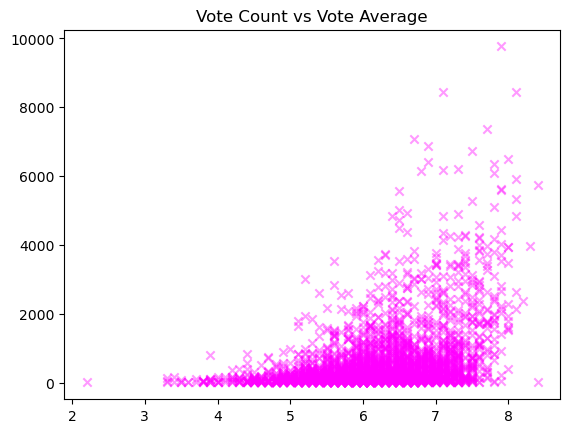

In [17]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = popular_sorted_df['vote_average'], 
            y = popular_sorted_df['vote_count'],
           color = 'magenta', 
           marker = 'x', 
           alpha = .4)

ax1.set_title('Vote Count vs Vote Average')
plt.show()


The scatterplot above shows vote average vs vote count. The scatterplot includes over 3,000 movies. 



Since the dataset was condensed by removing all duplicates, the dataset went from over 10,000 movies down to 3,000. The stats also changed since the dataset was altered. 

The majority of movies have a vote average between 5 and 7 with the average number of votes being from 0-1500. 

In [75]:
year = popular_sorted_df.groupby('release_year').count()['id']


In the line above, it shows grouping the dataset together by the release year and counting how many movies were released each year. 

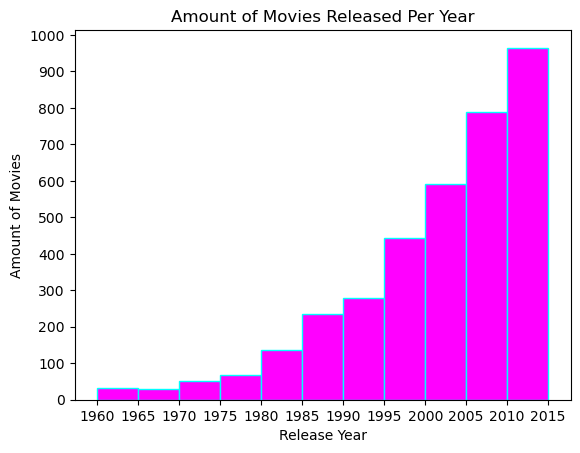

In [82]:
fig2, ax2 = plt.subplots()
plt.hist(year.index, bins=np.arange(1960, 2016, 5), 
         weights = year, edgecolor ='cyan', color = 'magenta')

plt.xlabel('Release Year')
plt.ylabel('Amount of Movies')
plt.title('Amount of Movies Released Per Year')


plt.xticks(np.arange(1960, 2016, 5))
plt.yticks(np.arange(0, 1100, 100))


plt.show()

The dataframe above shows the histogram of amount of movies released per year. The years range from 1960-2015 and the amount of movies ranges from 0-1000. I changed the intervals of the release years to 5 and the amount of movies to 100 to make the graph easier to read. 

In this draft, I found myself stuck on how to get the timestamp to work. I spent majority of my time on that instead of analysis, graphs, testing, etc. My final project will include more graphs, more orginzation, and more analysis. I have worked through the majority of my problems, so adding more details to complete my project should not be difficult. 

From this project, the audience should be able to understand trends and patterns that are happening within the industry. This data can be used to predict trends, movie preformance, genre preference, cast/director preference etc. This data will also be able to explain what makes a movie successful in terms of ratings and popularity. This data will show different characteristics that contribute to the overall succes of a movie. This project will also show how much money a movie brings in verse the budget of the movie. Also, many questions can be answered from this project that can bring insight to the audience about the film-making industry and how decisions can be made off of data. 